# 9. Interactive Data Visualization

_Damian Trilling and Penny Sheets_

This notebook gives some examples for how to create interactive visualizations
for the web.

We will use the following three visualization packages:

- `bokeh`
- `pygal`
- `plotly`

`bokeh` allows you to create interactive visualizations in which users can hover
over elements, zoom in, etc. `pygal` allows you to create standard charts with
hover-effects. `plotly` is a very extensive package that is related to a whole
ecosystem to build interactive apps, but since short time, you can make use of
some of its functionality directly via `pandas`!

## Download the sample data

The first time you run this notebook, you will need to download some example
data. You only need to do this once, and should "comment out" (put hashtags in
front of) the following two lines again after running them once.


In [1]:
#pip install cairosvg

In [2]:
#pip install bokeh
#pip install bokeh_sampledata

In [3]:
#pip install pygal

In [4]:
#pip install plotly

# Interactivity

As discussed in the literature of week 4, interactivity should have a function.
For instance, it can be used to reduce information overload while still
providing information 'on demand' if users want to dig into it.

Consider the example below (under the bokeh section), where the user at a first
glance can get an idea of the geographical distribution of unemployment, but if
they really want to know more, can even get the exact number for each and every
county by hovering over it.

More complicated online demos of bokeh apps are available here:

- https://demo.bokeh.org/movies
- https://demo.bokeh.org/weather


### But first, we'll start with an example using pygal

For more info and examples, see http://www.pygal.org .

It will make your bar charts etc. just a bit more attractive by allowing things
like displaying values when hovering over columns with the mouse.


In [5]:
import pygal
import bokeh
import pandas as pd
%matplotlib inline


In [ ]:
# First we create a bar graph object (this is sort of like how we did in Seaborn, creating a blank canvas 
# before telling it what to put on that canvas.)

mylittle_bar_chart = pygal.Bar()                                            

# Next we add some values to it; in this case, we're adding the Fibonacci number sequence, and labeling it accordingly.
mylittle_bar_chart.add('Fibonacci', [0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55])
mylittle_bar_chart.add('whatever', [3,5,6,7,8])

In [7]:
print("Penny INC went up tremenously", 
      mylittle_bar_chart.render_sparktext(),
      "and you should invest in it.")

Penny INC went up tremenously ▁▁▁▁▁▁▂▂▃▅█ and you should invest in it.


In [8]:
mylittle_bar_chart.render_sparkline()

b'<?xml version=\'1.0\' encoding=\'utf-8\'?>\n<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" id="chart-82c0ea82-e0e8-49d5-b378-a5d44ec56563" class="pygal-chart pygal-sparkline" viewBox="0 0 200 50" width="200" height="50"><!--Generated with pygal 3.0.5 (lxml) \xc2\xa9Kozea 2012-2016 on 2024-11-06--><!--http://pygal.org--><!--http://github.com/Kozea/pygal--><defs><style type="text/css">#chart-82c0ea82-e0e8-49d5-b378-a5d44ec56563{-webkit-user-select:none;-webkit-font-smoothing:antialiased;font-family:Consolas,"Liberation Mono",Menlo,Courier,monospace}#chart-82c0ea82-e0e8-49d5-b378-a5d44ec56563 .title{font-family:Consolas,"Liberation Mono",Menlo,Courier,monospace;font-size:16px}#chart-82c0ea82-e0e8-49d5-b378-a5d44ec56563 .legends .legend text{font-family:Consolas,"Liberation Mono",Menlo,Courier,monospace;font-size:14px}#chart-82c0ea82-e0e8-49d5-b378-a5d44ec56563 .axis text{font-family:Consolas,"Liberation Mono",Menlo,Courier,monospace;font-size:10px}#ch

In [9]:
# With pygal, you can render this into an .svg visualization for display in your web browser.

mylittle_bar_chart.render_in_browser()

# or you can save to a file for later embedding/placement wherever you want it:
# bar_chart.render_to_file('bar_chart.svg') 


file:///var/folders/l0/0m8rr1_910j7vgvw7jz29qgc0000gn/T/tmp06c8a4qi.html


In [10]:
mylittle_bar_chart.render_to_file('mytest.svg')

Let's do this with our own data that we used in an earlier notebook. We first do
it the old-fashioned way that we already know, then we use pygal instead.


In [11]:
mediause = pd.read_csv('https://raw.githubusercontent.com/uvacw/datajournalism/master/mediause.csv')
mediause

,gender,age,education,radio,newspaper,tv,internet
0,1,71,4.0,5,6,5,0
1,1,40,2.0,6,0,0,0
2,1,41,2.0,4,3,7,3
3,0,65,5.0,0,0,5,0
4,0,39,2.0,0,1,7,7
...,...,...,...,...,...,...,...
2076,0,49,5.0,3,6,6,0
2077,0,51,4.0,7,7,5,5
2078,1,31,6.0,3,5,5,6
2079,0,58,6.0,3,3,1,0


In [12]:
frequency_of_internet_use = mediause['internet'].value_counts().sort_index()
frequency_of_internet_use

internet
0    811
1    189
2    174
3    150
4    104
5    145
6     98
7    410
Name: count, dtype: int64

<Axes: xlabel='internet'>

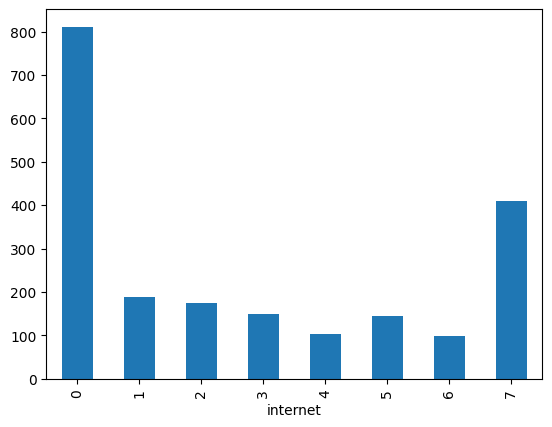

In [13]:
frequency_of_internet_use.plot(kind='bar')

In [ ]:
bar_chart = pygal.Bar()                                            

frequency_of_internet_use = mediause['internet'].value_counts().sort_index()
frequency_of_tv_use = mediause['tv'].value_counts().sort_index()
frequency_of_newspaper_use = mediause['newspaper'].value_counts().sort_index()

# let's add labels to the x axis
# we could do:
# bar_chart.x_labels = range(8) to generate the numbers 0...8
# or supply a list manually,
# or we re-use the index of our data:
bar_chart.x_labels = frequency_of_internet_use.index


# Next we add some values to it; in this case, we're adding the Fibonacci number sequence, and labeling it accordingly.
bar_chart.add('internet', frequency_of_internet_use)
bar_chart.add('tv', frequency_of_tv_use)
bar_chart.add('newspaper', frequency_of_newspaper_use)


In [15]:
bar_chart.render_to_file

<bound method PublicApi.render_to_file of <pygal.graph.bar.Bar object at 0x17494b2c0>>

### An example with bokeh

This one is taken from an existing demo online (on the website of bokeh), to
show bokeh's capacities. But all documentation and further info can be found at
the link here, for more info & examples: https://bokeh.org/


In [16]:
from bokeh.io import show, output_file
from bokeh.models import LogColorMapper
from bokeh.palettes import Viridis6 as palette
from bokeh.plotting import figure

from bokeh.sampledata.us_counties import data as counties
from bokeh.sampledata.unemployment import data as unemployment

In [17]:
len(unemployment)

3218

In [18]:
unemployment

{(1, 1): 9.7,
 (1, 3): 9.1,
 (1, 5): 13.4,
 (1, 7): 12.1,
 (1, 9): 9.9,
 (1, 11): 16.4,
 (1, 13): 16.7,
 (1, 15): 10.8,
 (1, 17): 18.6,
 (1, 19): 11.8,
 (1, 21): 9.9,
 (1, 23): 12.7,
 (1, 25): 17.0,
 (1, 27): 15.9,
 (1, 29): 10.4,
 (1, 31): 8.5,
 (1, 33): 11.4,
 (1, 35): 19.5,
 (1, 37): 14.0,
 (1, 39): 10.1,
 (1, 41): 9.7,
 (1, 43): 9.6,
 (1, 45): 9.3,
 (1, 47): 21.1,
 (1, 49): 14.3,
 (1, 51): 9.0,
 (1, 53): 12.9,
 (1, 55): 10.7,
 (1, 57): 12.8,
 (1, 59): 12.3,
 (1, 61): 10.0,
 (1, 63): 14.7,
 (1, 65): 12.7,
 (1, 67): 9.9,
 (1, 69): 8.9,
 (1, 71): 11.8,
 (1, 73): 10.7,
 (1, 75): 14.8,
 (1, 77): 10.5,
 (1, 79): 13.6,
 (1, 81): 8.6,
 (1, 83): 9.3,
 (1, 85): 18.5,
 (1, 87): 11.4,
 (1, 89): 7.5,
 (1, 91): 14.8,
 (1, 93): 15.2,
 (1, 95): 9.2,
 (1, 97): 11.1,
 (1, 99): 18.7,
 (1, 101): 10.2,
 (1, 103): 10.4,
 (1, 105): 19.8,
 (1, 107): 13.0,
 (1, 109): 8.7,
 (1, 111): 15.1,
 (1, 113): 12.6,
 (1, 115): 10.7,
 (1, 117): 7.6,
 (1, 119): 13.9,
 (1, 121): 13.6,
 (1, 123): 13.7,
 (1, 125): 9.0,
 (

In [19]:
counties = {
    code: county for code, county in counties.items() if county["state"] == "tx"
}

county_xs = [county["lons"] for county in counties.values()]
county_ys = [county["lats"] for county in counties.values()]

county_names = [county['name'] for county in counties.values()]
county_rates = [unemployment[county_id] for county_id in counties]
color_mapper = LogColorMapper(palette=palette)

data=dict(
    x=county_xs,
    y=county_ys,
    name=county_names,
    rate=county_rates,
)

TOOLS = "pan,wheel_zoom,reset,hover,save"

p = figure(
    title="Texas Unemployment, 2009", tools=TOOLS,
    x_axis_location=None, y_axis_location=None,
    tooltips=[
        ("Name", "@name"), ("Unemployment rate)", "@rate%"), ("(Long, Lat)", "($x, $y)")
    ])
p.grid.grid_line_color = None
p.hover.point_policy = "follow_mouse"

p.patches('x', 'y', source=data,
          fill_color={'field': 'rate', 'transform': color_mapper},
          fill_alpha=0.7, line_color="white", line_width=0.5)



# save to file
output_file('bokeh-example.html')

# and/or show in browser
show(p)

## An example with plotly

plotly is an extensive visualization library that is part of a larger ecosystem
to build dashboards and apps. But what's nice is that since pandas 0.25, you can
even use it as a drop-in replacement for matplotlib as backend. It's just one
line: `pd.options.plotting.backend = "plotly"`

Read more here: https://plotly.com/python/pandas-backend/


In [20]:
pd.options.plotting.backend = "plotly"

mediause['average'] = mediause[['radio','tv','newspaper','internet']].mean(axis=1)
# we sample 50 points here just to make the graph clearer, of course that doesn't make much sense conceptually here
fig = mediause.sample(50).plot(x='age', y='average', kind='scatter')
fig.show()
fig.write_html("plotly-example.html")

In [21]:
# let's add some more data to the hover-over box
# look at https://towardsdatascience.com/visualization-with-plotly-express-comprehensive-guide-eb5ee4b50b57 for more info
# e.g., we can also specify color = 'varname', size = 'varname' etc. - very much like in seaborn
fig = mediause.sample(50).plot(x='age', y='average', hover_data={"gender":True},kind='scatter')
fig.show()

In [22]:
mediause.internet.hist()


# Publishing interactivity

Publishing and distributing your STATIC visualizations is straightforward (see
week 4 of this course). You can simply save them in any format you like (e.g.,
`.png` (better than `.jpg` for text and sharp lines), or as a vector graphic
(e.g., `.svg`) that allows loss-free scaling. For example, we could use
`plt.save_fig()` for that purpose.

This file, then, can be freely used in any online or offline publication.

But how can we do this online? It's one thing to make a nice interactive
visualization in _your_ browser, it's another thing to share them with the
world.

## SVG graphics

One approach are SVG graphics. That's the route we took in the pygal example
above. As you see, you can just open the file in any browser, and the
interactive elements (hovering over the bars with your mouse shows the values)
work.

However, there is one problem with this approach: First, the possibilities types
of interactivity possible are a bit limited. Second, and more importantly: SVG
graphics are sometimes seen as a security risk (because one could construct a
malicious svg file that executes unwanted code); and therefore, many platforms
restrict their use (for instance, Wordpress - although you can (partly)
circumvent this, for instance by installing a svg plugin).

If you build your own website from scratch, that's less of a problem, of course.

Here, you can find an example of how to embed svg graphics in a web page:
http://www.pygal.org/en/stable/documentation/web.html

## JavaScript (client-side)

The bokeh example above takes a different approach: It generates an HTML file
and java script code that then is used to render the interactive graphic in the
users' browser. That means that if we distribute the HTML file (and, for
instance, upload it to our own website; I did it
[here](http://www.damiantrilling.net/downloads/test.html)), anyone can use it in
their browser.

It requires a bit more fiddling, though, to display such a thing inline (for
instance, like embedding a picture within a wordpress blog). With a bit of HTML
knowledge, though, you can get there. You can find a lot of (free) HTML
tutorials online.

## Server-side approaches

Both approaches outlined above are _self-contained_: They include all data, all
calculations are already made, etc. Especially if you have very large data, or
when you want to actually run some python code based on the user input, you will
need to run your own (bokeh-) server. That's a cool thing to do (and a nice
project to pursue, if you want to experiment a bit), but out of scope for this
class.


# Exercise

The example below is from the official bokeh tutorial
(https://mybinder.org/v2/gh/bokeh/bokeh-notebooks/master?filepath=tutorial%2F00%20-%20Introduction%20and%20Setup.ipynb
). It plots a complex chart with intearctive hover.

**Try to understand the code (in broad lines) and modify it to explore what
happens. Construct a different visualization, or use other (own?) data.**


In [23]:
# import modules and prepare example dataset

from bokeh.models import ColumnDataSource, HoverTool
from bokeh.plotting import figure
from bokeh.sampledata.autompg import autompg_clean as df
from bokeh.transform import factor_cmap

df.cyl = df.cyl.astype(str)
df.yr = df.yr.astype(str)

In [24]:
df

,mpg,cyl,displ,hp,weight,accel,yr,origin,name,mfr
0,18.0,8,307.0,130,3504,12.0,70,North America,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,North America,buick skylark 320,buick
2,18.0,8,318.0,150,3436,11.0,70,North America,plymouth satellite,plymouth
3,16.0,8,304.0,150,3433,12.0,70,North America,amc rebel sst,amc
4,17.0,8,302.0,140,3449,10.5,70,North America,ford torino,ford
...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,North America,ford mustang gl,ford
388,44.0,4,97.0,52,2130,24.6,82,Europe,vw pickup,volkswagen
389,32.0,4,135.0,84,2295,11.6,82,North America,dodge rampage,dodge
390,28.0,4,120.0,79,2625,18.6,82,North America,ford ranger,ford


In [26]:
group = df.groupby(by=['cyl', 'mfr'])
source = ColumnDataSource(group)

p = figure(width=800, height=300, title="Mean MPG by # Cylinders and Manufacturer",
           x_range=group, toolbar_location=None, tools="")

p.xgrid.grid_line_color = None
p.xaxis.axis_label = "Manufacturer grouped by # Cylinders"
p.xaxis.major_label_orientation = 1.2

index_cmap = factor_cmap('cyl_mfr', palette=['#2b83ba', '#abdda4', '#ffffbf', '#fdae61', '#d7191c'], 
                         factors=sorted(df.cyl.unique()), end=1)

p.vbar(x='cyl_mfr', top='mpg_mean', width=1, source=source,
       line_color="white", fill_color=index_cmap, 
       hover_line_color="darkgrey", hover_fill_color=index_cmap)

p.add_tools(HoverTool(tooltips=[("MPG", "@mpg_mean"), ("Cyl, Mfr", "@cyl_mfr")]))

show(p)

To give you a little help, I made one with our mediause dataset:


In [27]:
group = mediause.groupby('education')
source = ColumnDataSource(group)

p = figure()
p.vbar(x='education', top='internet_mean', width=1, source=source,
       line_color="white")

p.add_tools(HoverTool(tooltips=[("internet use", "@internet_mean"), ("education", "@education")]))

show(p)

In [28]:
group['internet'].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
1.0,68.0,1.397059,2.266826,0.0,0.0,0.0,2.0,7.0
2.0,323.0,1.829721,2.498220,0.0,0.0,0.0,3.0,7.0
3.0,214.0,2.093458,2.589371,0.0,0.0,1.0,4.0,7.0
4.0,667.0,2.499250,2.752217,0.0,0.0,1.0,5.0,7.0
5.0,178.0,2.589888,2.650085,0.0,0.0,2.0,5.0,7.0
6.0,396.0,3.520202,2.841304,0.0,1.0,4.0,7.0,7.0
7.0,219.0,4.059361,2.705947,0.0,1.5,5.0,7.0,7.0


In [32]:
mediause_nice = mediause.copy()
mediause_nice['education'] = mediause_nice['education'].replace({1: '1 basis', 2:'2 vmbo', 3: '3 vmbo-t', 4: '4 mbo', 5: '5 hbo', 6:'6 wo-bachelor',
                               7:'7 wo-master'})

group = mediause_nice.groupby('education')
source = ColumnDataSource(group)

p = figure(x_range=group)
p.vbar(x='education', top='internet_mean', width=1, source=source,
       line_color="white")

p.add_tools(HoverTool(tooltips=[("internet use", "@internet_mean"), ("education", "@education")]))

show(p)